# Lab | Data Cleaning and Formatting

In this lab, we will be working with the customer data from an insurance company, which can be found in the CSV file located at the following link: https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv


# Challenge 1: Data Cleaning and Formatting

## Exercise 1: Cleaning Column Names

To ensure consistency and ease of use, standardize the column names of the dataframe. Start by taking a first look at the dataframe and identifying any column names that need to be modified. Use appropriate naming conventions and make sure that column names are descriptive and informative.

*Hint*:
- *Column names should be in lower case*
- *White spaces in column names should be replaced by `_`*
- *`st` could be replaced for `state`*

In [4]:
# Your code here
import numpy as np
import pandas as pd

df= pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv")
df.head()

df.columns = list(map(str.lower, df.columns))

def spaceChange(mystring):
    return mystring.replace(" ", "_")
    
df.columns= list(map(spaceChange, df.columns))



df = df.rename(columns={'st': 'state'})

df.head()


,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323


## Exercise 2: Cleaning invalid Values

The dataset contains columns with inconsistent and incorrect values that could affect the accuracy of our analysis. Therefore, we need to clean these columns to ensure that they only contain valid data.

Note that this exercise will focus only on cleaning inconsistent values and will not involve handling null values (NaN or None).

*Hint*:
- *Gender column contains various inconsistent values such as "F", "M", "Femal", "Male", "female", which need to be standardized, for example, to "M" and "F".*
- *State abbreviations be can replaced with its full name, for example "AZ": "Arizona", "Cali": "California", "WA": "Washington"*
- *In education, "Bachelors" could be replaced by "Bachelor"*
- *In Customer Lifetime Value, delete the `%` character*
- *In vehicle class, "Sports Car", "Luxury SUV" and "Luxury Car" could be replaced by "Luxury"*

In [5]:
# Your code here
for cols in df.columns:
    if df[cols].nunique()<20:
        display(df[cols].unique())
df.columns


gender_std = {'F':'F','M':'M','Femal':'F','Male':'M','female':'F'}
df['gender'] = df['gender'].replace(gender_std)
df['gender'].unique()

state_std = {'Washington': 'WA','Arizona': 'AZ','Nevada': 'NV',
             'California': 'CA','Oregon': 'OR','Cali': 'CA','AZ': 'AZ','WA': 'WA'}

df['state'] = df['state'].replace(state_std)
df['state'].unique()

edu_std = {'Bachelors':'Bachelor'}
df['education'] = df['education'].replace(edu_std)
df['education'].unique()

df['customer_lifetime_value'] = df['customer_lifetime_value'].str.replace('%','') ##ask why do we use str.replace
df['customer_lifetime_value'].unique()

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon', 'Cali',
       'AZ', 'WA', nan], dtype=object)

array([nan, 'F', 'M', 'Femal', 'Male', 'female'], dtype=object)

array(['Master', 'Bachelor', 'High School or Below', 'College',
       'Bachelors', 'Doctor', nan], dtype=object)

array(['1/0/00', '1/2/00', '1/1/00', '1/3/00', '1/5/00', '1/4/00', nan],
      dtype=object)

array(['Personal Auto', 'Corporate Auto', 'Special Auto', nan],
      dtype=object)

array(['Four-Door Car', 'Two-Door Car', 'SUV', 'Luxury SUV', 'Sports Car',
       'Luxury Car', nan], dtype=object)

array([nan, '697953.59', '1288743.17', ..., '2031499.76', '323912.47',
       '899704.02'], dtype=object)

## Exercise 3: Formatting data types

The data types of many columns in the dataset appear to be incorrect. This could impact the accuracy of our analysis. To ensure accurate analysis, we need to correct the data types of these columns. Please update the data types of the columns as appropriate.

It is important to note that this exercise does not involve handling null values (NaN or None).

*Hint*:
- *Customer lifetime value should be numeric*
- *Number of open complaints has an incorrect format. Look at the different values it takes with `unique()` and take the middle value. As an example, 1/5/00 should be 5. Number of open complaints is a string - remember you can use `split()` to deal with it and take the number you need. Finally, since it should be numeric, cast the column to be in its proper type.*

In [6]:
# Your code here

# df["customer_lifetime_value"]= pd.to_numeric(["customer_lifetime_value"])
df['customer_lifetime_value'] = pd.to_numeric(df['customer_lifetime_value'], errors = 'coerce')
display(df.dtypes)

#chatgpt
df = df[df['customer_lifetime_value'].notna() & (df['customer_lifetime_value'] != 0)]

# df["number_of_open_complaints"] = map(str.split("/")[1], df["number_of_open_complaints"])

new_list= []

for item in df["number_of_open_complaints"]:
    new_list.append(item.split("/")[1])

df["number_of_open_complaints"] = new_list

df.head()

customer                      object
state                         object
gender                        object
education                     object
customer_lifetime_value      float64
income                       float64
monthly_premium_auto         float64
number_of_open_complaints     object
policy_type                   object
vehicle_class                 object
total_claim_amount           float64
dtype: object

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
1,QZ44356,AZ,F,Bachelor,697953.59,0.0,94.0,0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,NV,F,Bachelor,1288743.17,48767.0,108.0,0,Personal Auto,Two-Door Car,566.472247
3,WW63253,CA,M,Bachelor,764586.18,0.0,106.0,0,Corporate Auto,SUV,529.881344
4,GA49547,WA,M,High School or Below,536307.65,36357.0,68.0,0,Personal Auto,Four-Door Car,17.269323
5,OC83172,OR,F,Bachelor,825629.78,62902.0,69.0,0,Personal Auto,Two-Door Car,159.383042


## Exercise 4: Dealing with Null values

Identify any columns with null or missing values. Identify how many null values each column has. You can use the `isnull()` function in pandas to find columns with null values.

Decide on a strategy for handling the null values. There are several options, including:

- Drop the rows or columns with null values
- Fill the null values with a specific value (such as the column mean or median for numerical variables, and mode for categorical variables)
- Fill the null values with the previous or next value in the column
- Fill the null values based on a more complex algorithm or model (note: we haven't covered this yet)

Implement your chosen strategy to handle the null values. You can use the `fillna()` function in pandas to fill null values or `dropna()` function to drop null values.

Verify that your strategy has successfully handled the null values. You can use the `isnull()` function again to check if there are still null values in the dataset.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling null values.

After formatting data types, as a last step, convert all the numeric variables to integers.

In [7]:
# Your code here
df= df.dropna()

## Exercise 5: Dealing with duplicates

Use the `.duplicated()` method to identify any duplicate rows in the dataframe.

Decide on a strategy for handling the duplicates. Options include:
- Dropping all duplicate rows
- Keeping only the first occurrence of each duplicated row
- Keeping only the last occurrence of each duplicated row
- Dropping duplicates based on a subset of columns
- Dropping duplicates based on a specific column

Implement your chosen strategy using the `drop_duplicates()` function.

Verify that your strategy has successfully handled the duplicates by checking for duplicates again using `.duplicated()`.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling duplicates.

Save the cleaned dataset to a new CSV file.

*Hint*: *after dropping duplicates, reset the index to ensure consistency*.

In [8]:
# Your code here
df1 = df.drop_duplicates()

# Bonus: Challenge 2: creating functions on a separate `py` file

Put all the data cleaning and formatting steps into functions, and create a main function that performs all the cleaning and formatting.

Write these functions in separate .py file(s). By putting these steps into functions, we can make the code more modular and easier to maintain.

*Hint: autoreload module is a utility module in Python that allows you to automatically reload modules in the current session when changes are made to the source code. This can be useful in situations where you are actively developing code and want to see the effects of changes you make without having to constantly restart the Python interpreter or Jupyter Notebook kernel.*

In [9]:
# Your code here

# Bonus: Challenge 3: Analyzing Clean and Formated Data

You have been tasked with analyzing the data to identify potential areas for improving customer retention and profitability. Your goal is to identify customers with a high policy claim amount and a low customer lifetime value.

In the Pandas Lab, we only looked at high policy claim amounts because we couldn't look into low customer lifetime values. If we had tried to work with that column, we wouldn't have been able to because customer lifetime value wasn't clean and in its proper format. So after cleaning and formatting the data, let's get some more interesting insights!

Instructions:

- Review the statistics again for total claim amount and customer lifetime value to gain an understanding of the data.
- To identify potential areas for improving customer retention and profitability, we want to focus on customers with a high policy claim amount and a low customer lifetime value. Consider customers with a high policy claim amount to be those in the top 25% of the total claim amount, and clients with a low customer lifetime value to be those in the bottom 25% of the customer lifetime value. Create a pandas DataFrame object that contains information about customers with a policy claim amount greater than the 75th percentile and a customer lifetime value in the bottom 25th percentile.
- Use DataFrame methods to calculate summary statistics about the high policy claim amount and low customer lifetime value data. To do so, select both columns of the dataframe simultaneously and pass it to the `.describe()` method. This will give you descriptive statistics, such as mean, median, standard deviation, minimum and maximum values for both columns at the same time, allowing you to compare and analyze their characteristics.

In [10]:
# Your code here


# NEW LAB

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns 

df. describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,952.0,794201.286303,625879.161398,200435.070000,411783.580000,588574.53,903750.915,4.479547e+06
income,952.0,39557.350840,30744.561851,0.000000,13087.750000,36632.00,65085.500,9.996000e+04
monthly_premium_auto,952.0,205.231092,1697.752504,61.000000,68.000000,83.00,110.000,3.535400e+04
total_claim_amount,952.0,404.999156,299.238726,0.382107,196.724587,350.40,534.000,2.893240e+03


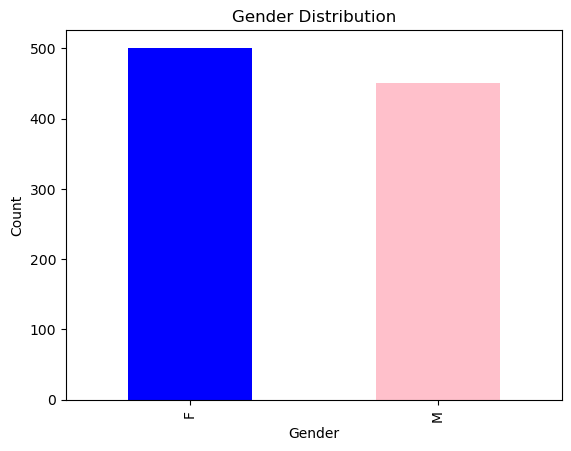

In [12]:
import matplotlib.pyplot as plt
# Plot the counts of each gender
gender_counts = df['gender'].value_counts()

# Plot a bar chart
gender_counts.plot(kind='bar', color=['blue', 'pink'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

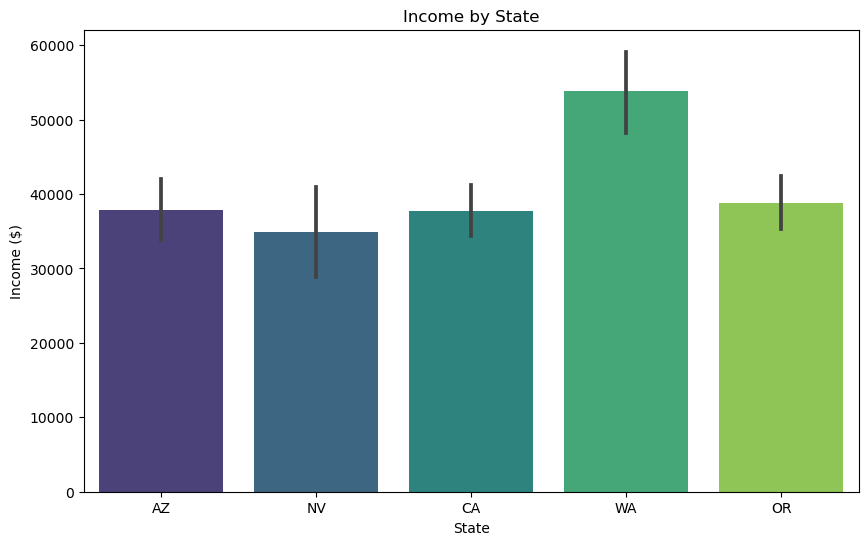

In [13]:
##income by state

import seaborn as sns

# Seaborn bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='state', y='income', data=df, palette='viridis')
plt.title('Income by State')
plt.xlabel('State')
plt.ylabel('Income ($)')
plt.show()

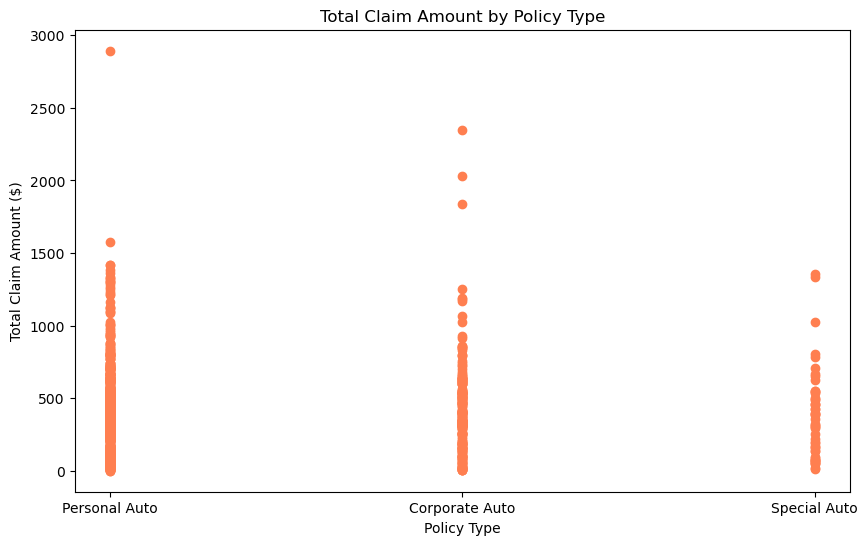

In [14]:
#policy type by the total claim amount

plt.figure(figsize=(10, 6))
plt.scatter(df['policy_type'], df['total_claim_amount'], color='coral')
plt.title('Total Claim Amount by Policy Type')
plt.xlabel('Policy Type')
plt.ylabel('Total Claim Amount ($)')
plt.show()

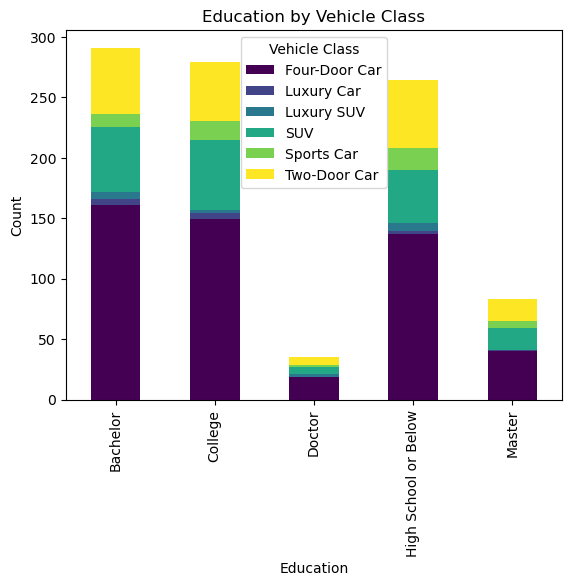

In [15]:
#Education by Vehicle Class

# Count the occurrences of each combination of Education and Vehicle Class
education_vehicle_counts = df.groupby(['education', 'vehicle_class']).size().unstack()

# Bar plot
education_vehicle_counts.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Education by Vehicle Class')
plt.xlabel('Education')
plt.ylabel('Count')
plt.legend(title='Vehicle Class')
plt.show()

In [16]:
#more female data so probably more accurate
#strong negative correlation total amount claimed and policy type total auto less then corporate and alot less then auto
#vehicle types are relativly evenly distributed in each education type

In [17]:
df.head()

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
1,QZ44356,AZ,F,Bachelor,697953.59,0.0,94.0,0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,NV,F,Bachelor,1288743.17,48767.0,108.0,0,Personal Auto,Two-Door Car,566.472247
3,WW63253,CA,M,Bachelor,764586.18,0.0,106.0,0,Corporate Auto,SUV,529.881344
4,GA49547,WA,M,High School or Below,536307.65,36357.0,68.0,0,Personal Auto,Four-Door Car,17.269323
5,OC83172,OR,F,Bachelor,825629.78,62902.0,69.0,0,Personal Auto,Two-Door Car,159.383042


In [18]:
#maybe the income / customer_lifetime_value to see if that makes a difference and if more wealthy customers spend more or less over a lifetime

# NEW LAB THURSDAY 1

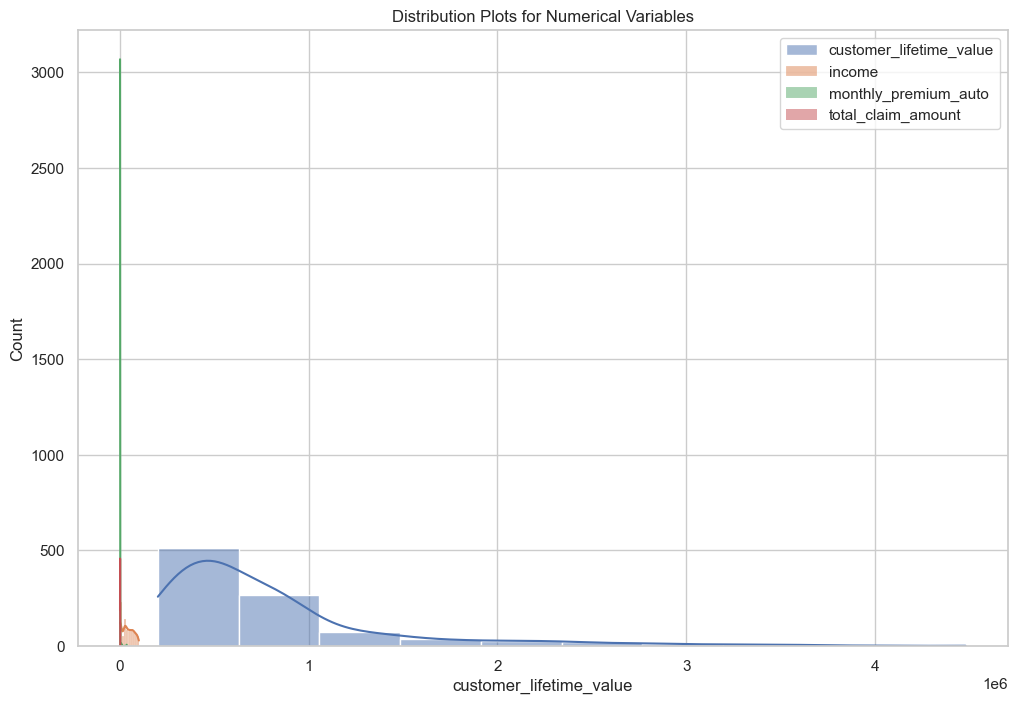

In [29]:
# y = df['TARGET_D']
# X = df.drop(['TARGET_D'], axis=1)

# X_num = X.select_dtypes(include = np.number)
# X_cat = X.select_dtypes(include = object)

numerical= df.select_dtypes(include = np.number)
categorial=df.select_dtypes(include = object)
categorial.head()

import matplotlib.pyplot as plt
import seaborn as sns

# sns.displot(numerical)
# plt.show()

sns.set(style="whitegrid")

# Create distribution plots for numerical variables
plt.figure(figsize=(12, 8))

for column in numerical:
        sns.histplot(numerical[column], kde=True, label=column, bins=10)

plt.title('Distribution Plots for Numerical Variables')
plt.legend()
plt.show()

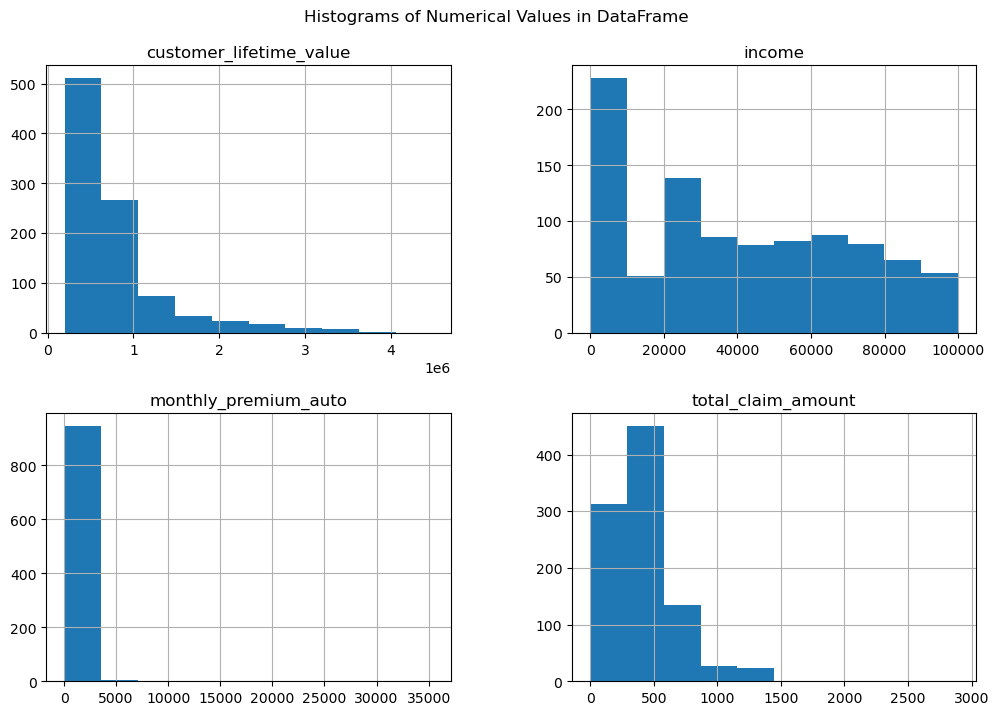

In [26]:
df.hist(bins=10, figsize=(12, 8))
plt.suptitle('Histograms of Numerical Values in DataFrame', y=0.95)
plt.show()

In [31]:
##

In [32]:
numerical.corr()

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
customer_lifetime_value,1.000000,0.030614,0.004180,0.139519
income,0.030614,1.000000,0.051882,-0.366088
monthly_premium_auto,0.004180,0.051882,1.000000,-0.041990
total_claim_amount,0.139519,-0.366088,-0.041990,1.000000


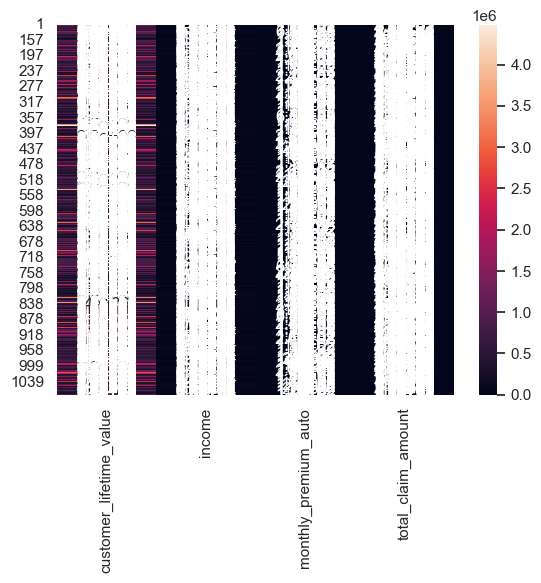

In [38]:
# no value over 0.9 not dropping cols

sns.heatmap(numerical, annot=True)
plt.show()

C:\Users\beite\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


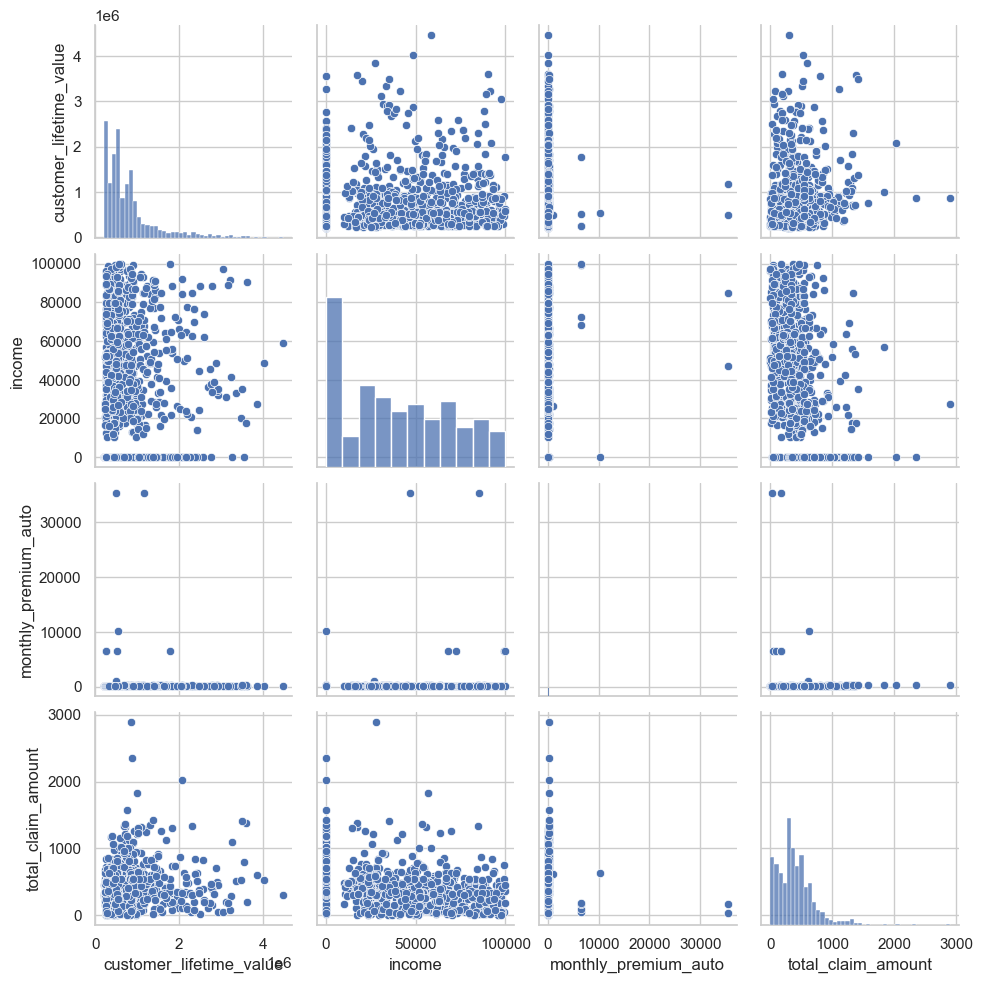

In [34]:
# sns.pairplot(numerical)
# plt.show()

# Lab Round 5

In [43]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
lm = linear_model.LinearRegression()
lm.fit(X,y)
print("b0 = " , lm.intercept_)
print("b1 = " , lm.coef_)

y = numerical['total_claim_amount']
X = numerical.drop(['total_claim_amount'], axis=1)
y_pred = lm.predict(X)
lm3 = linear_model.LinearRegression()
lm3.fit(X,y)
print(lm3.score(X,y))
y_pred=lm3.predict(X)
# print(mean_squared_error(y_pred,y))

b0 =  490.7972675644788
b1 =  [ 7.21604838e-05 -3.59629145e-03 -4.13337844e-03]
0.15730904435095616
